<a href="https://colab.research.google.com/github/abhijeetardale/ML/blob/master/FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

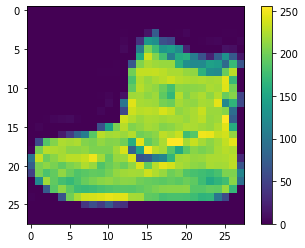

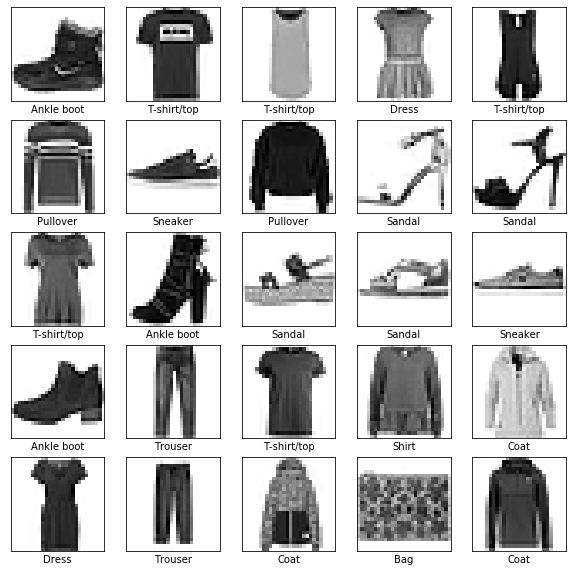

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.5013 - accuracy: 0.8249
Epoch 2/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.3761 - accuracy: 0.8641
Epoch 3/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.3373 - accuracy: 0.8770
Epoch 4/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.3140 - accuracy: 0.8849
Epoch 5/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.2956 - accuracy: 0.8911
Epoch 6/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.2795 - accuracy: 0.8973
Epoch 7/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.2706 - accuracy: 0.9001
Epoch 8/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.2594 - accuracy: 0.9048
Epoch 9/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.2481 - accuracy: 0.9084
Epoch 10/10
60

In [2]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images.shape

len(train_labels)

train_labels

test_images.shape

len(test_labels)

test_labels

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

train_images = train_images / 255.0

test_images = test_images / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

In [5]:
predictions = model.predict(test_images)
predictions[0]
np.argmax(predictions[0])
test_labels[0]

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

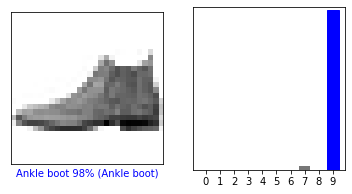

In [7]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

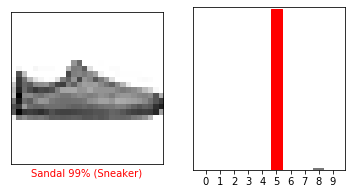

In [8]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

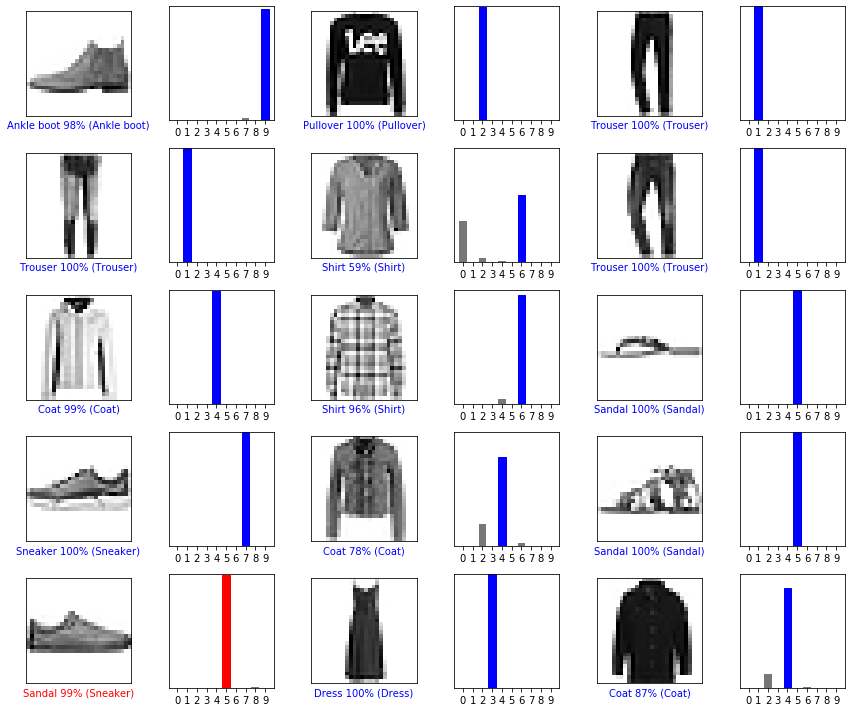

In [9]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [11]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

img = (np.expand_dims(img,0))

print(img.shape)

(28, 28)
(1, 28, 28)


In [12]:
predictions_single = model.predict(img)

print(predictions_single)

[[9.9431745e-05 1.4314086e-10 9.9877101e-01 4.8275456e-10 6.1742612e-04
  1.1601498e-18 5.1211345e-04 8.8298517e-21 1.3593285e-10 1.3652616e-16]]


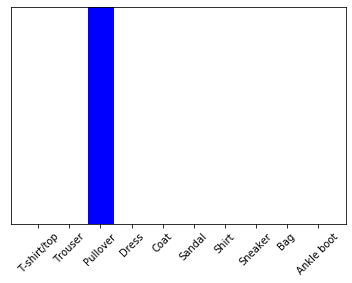

In [13]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [14]:
np.argmax(predictions_single[0])

2